# PyCaret 2 Clustering Example
This notebook is created using PyCaret 2.0. Last updated : 28-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

pycaret-nightly-0.39


# 1. Loading Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('public_health')

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


# 2. Initialize Setup

In [3]:
from pycaret.clustering import *
clu1 = setup(data, ignore_features = ['Country Name'], session_id=123, log_experiment=True, log_plots = True, experiment_name='health1')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(224, 21)"
2,Missing Values,False
3,Numeric Features,20
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(224, 20)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


# 3. Create Model

In [4]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster.KMeans
ap,Affinity Propagation,sklearn.cluster.AffinityPropagation
meanshift,Mean shift Clustering,sklearn.cluster.MeanShift
sc,Spectral Clustering,sklearn.cluster.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster.AgglomerativeClustering
dbscan,Density-Based Spatial Clustering,sklearn.cluster.DBSCAN
optics,OPTICS Clustering,sklearn.cluster.OPTICS
birch,Birch Clustering,sklearn.cluster.Birch
kmodes,K-Modes Clustering,git/nicodv/kmodes


In [5]:
kmeans = create_model('kmeans', num_clusters = 4)

,Metric
Silhouette,0.4335
Calinski-Harabasz,322.9575
Davies-Bouldin,0.7471


<Figure size 576x396 with 0 Axes>

In [6]:
kmodes = create_model('kmodes', num_clusters = 4)

,Metric
Silhouette,-0.3632
Calinski-Harabasz,1.2468
Davies-Bouldin,1.2297


<Figure size 576x396 with 0 Axes>

# 4. Assign Labels

In [7]:
kmeans_results = assign_model(kmeans)
kmeans_results.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161,Cluster 2
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012,Cluster 2
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717,Cluster 0
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603,Cluster 2
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448,Cluster 0


# 5. Analyze Model

In [8]:
plot_model(kmeans)

In [9]:
plot_model(kmeans, feature = 'Country Name', label=True)

In [10]:
plot_model(kmeans, plot = 'tsne')

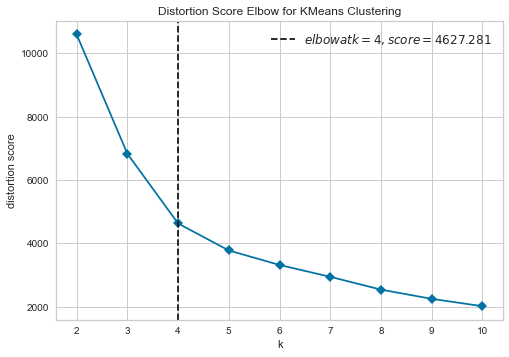

In [11]:
plot_model(kmeans, plot = 'elbow')

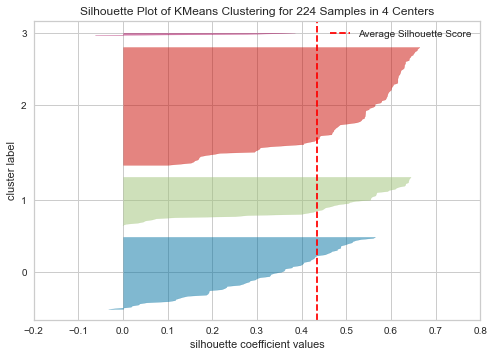

In [12]:
plot_model(kmeans, plot = 'silhouette')

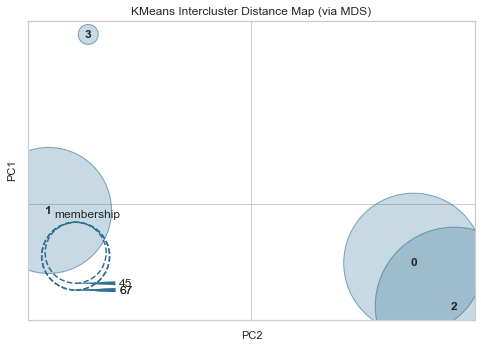

In [13]:
plot_model(kmeans, plot = 'distance')

In [14]:
plot_model(kmeans, plot = 'distribution')

# 6. Predict Model

In [15]:
pred_new = predict_model(kmeans, data=data)
pred_new.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161,Cluster 2
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012,Cluster 2
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717,Cluster 0
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603,Cluster 2
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448,Cluster 0


# 7. Save / Load Model

In [16]:
save_model(kmeans, model_name='kmeans')

Transformation Pipeline and Model Succesfully Saved


In [17]:
loaded_kmeans = load_model('kmeans')
print(loaded_kmeans)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Country Name'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
     

In [18]:
from sklearn import set_config
set_config(display='diagram')
loaded_kmeans[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Country Name'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
                ('group', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('binn', Empty()),
                ('fix_perfect', Empty()), ('rem_outliers', Empty()),
                ('dummy', Dummify(target='dummy_target')),
                ('clean_names', Clean_Colum_Names()), ('fix_multi', Empty()),
                ('pca', Empty())],
         verbose=False)

In [19]:
from sklearn import set_config
set_config(display='text')

# 8. Deploy Model

In [20]:
deploy_model(kmeans, model_name = 'kmeans-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 9. Get Config / Set Config

In [21]:
X = get_config('X')
X.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,2.314914,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,2.845971,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,4.913629,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,2.346824,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,4.626696,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


In [22]:
get_config('seed')

123

In [23]:
from pycaret.clustering import set_config
set_config('seed', 999)

In [24]:
get_config('seed')

999

# 10. Get System Logs

In [25]:
get_system_logs()

['2020-07-29 09', '47', '14,652', 'INFO', 'PyCaret Regression Module']
['2020-07-29 09', '47', '14,652', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 09', '47', '14,652', 'INFO', 'Initializing setup()']
['2020-07-29 09', '47', '14,652', 'INFO', 'USI', 'e640']
['2020-07-29 09', '47', '14,652', 'INFO', 'setup(data=(1338, 7), target=charges, train_size=0.7, sampling=True, sample_estimator=None, categorical_features=None, categorical_imputation=constant, ordinal_features=None,']
['high_cardinality_features=None, high_cardinality_method=frequency, numeric_features=None, numeric_imputation=mean, date_features=None, ignore_features=None, normalize=False,']
['normalize_method=zscore, transformation=False, transformation_method=yeo-johnson, handle_unknown_categorical=True, unknown_categorical_method=least_frequent, pca=False, pca_method=linear,']
['pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None, remove_outli

["('cluster_all', Empty()), ('dummy', Dummify(target='charges')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
["verbose=False), SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',"]
["kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), None]"]
['2020-07-29 09', '47', '53,690', 'INFO', 'save_model() succesfully completed......................................']
['2020-07-29 09', '47', '53,690', 'INFO', 'SubProcess save_model() end ==================================']
['2020-07-29 09', '47', '53,805', 'INFO', 'Initializing K Neighbors Regressor']
['2020-07-29 09', '47', '53,817', 'INFO', 'Initializing Fold 1']
['2020-07-29 09', '47', '53,831', 'INFO', 'Fitting Model']
['2020-07-29 09', '47', '53,838', 'INFO', 'Evaluating Metrics']
['2020-07-29 09', '47', '53,953', 'INFO', 'No inverse transformer found']
['2020-07-29 09', '47'

['2020-07-29 09', '48', '04,795', 'INFO', "save_model(model=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',"]
['n_estimators=50, random_state=123), model_name=Trained Model, verbose=False)']
['2020-07-29 09', '48', '04,796', 'INFO', 'Appending prep pipeline']
['2020-07-29 09', '48', '04,831', 'INFO', 'Trained Model.pkl saved in current working directory']
['2020-07-29 09', '48', '04,855', 'INFO', "KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',"]
["metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,"]
['radius=1.0)']
['2020-07-29 09', '48', '04,855', 'INFO', 'create_models() succesfully completed......................................']
['2020-07-29 09', '48', '04,856', 'INFO', '[Pipeline(memory=None,']
["steps=[('dtypes',"]
['DataTypes_Auto_infer(categorical_features=[],']
['display_types=True, features_todrop=[],']
["ml_usecase='regression',"]
["numerical_features=[], target='charges',"]
['time_features=[])),']
["('im

['2020-07-29 09', '49', '29,843', 'INFO', 'Evaluating Metrics']
['2020-07-29 09', '49', '29,850', 'INFO', 'No inverse transformer found']
['2020-07-29 09', '49', '29,850', 'INFO', 'Compiling Metrics']
['2020-07-29 09', '49', '29,888', 'INFO', 'Calculating mean and std']
['2020-07-29 09', '49', '29,891', 'INFO', 'Creating metrics dataframe']
['2020-07-29 09', '49', '29,955', 'INFO', 'Creating MLFlow logs']
['2020-07-29 09', '49', '30,209', 'INFO', 'SubProcess save_model() called ==================================']
['2020-07-29 09', '49', '30,210', 'INFO', 'Initializing save_model()']
['2020-07-29 09', '49', '30,211', 'INFO', 'save_model(model=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,']
['max_iter=1000, normalize=False, positive=False, precompute=False,']
["random_state=123, selection='cyclic', tol=0.0001, warm_start=False), model_name=Trained Model, verbose=False)"]
['2020-07-29 09', '49', '30,211', 'INFO', 'Appending prep pipeline']
['2020-07-29 09', '49', '

['2020-07-29 09', '49', '57,861', 'INFO', 'Compiling Metrics']
['2020-07-29 09', '49', '57,880', 'INFO', 'Calculating mean and std']
['2020-07-29 09', '49', '57,882', 'INFO', 'Creating metrics dataframe']
['2020-07-29 09', '49', '57,920', 'INFO', 'Creating MLFlow logs']
['2020-07-29 09', '49', '58,087', 'INFO', 'SubProcess save_model() called ==================================']
['2020-07-29 09', '49', '58,088', 'INFO', 'Initializing save_model()']
['2020-07-29 09', '49', '58,089', 'INFO', "save_model(model=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,"]
['max_features=None, max_leaf_nodes=None,']
['min_impurity_decrease=0.0, min_impurity_split=None,']
['min_samples_leaf=1, min_samples_split=2,']
["min_weight_fraction_leaf=0.0, presort='deprecated',"]
["random_state=123, splitter='best'), model_name=Trained Model, verbose=False)"]
['2020-07-29 09', '49', '58,090', 'INFO', 'Appending prep pipeline']
['2020-07-29 09', '49', '58,105', 'INFO', 'Trained Model.pkl sav

['2020-07-29 09', '50', '25,902', 'INFO', 'Declaring preprocessing parameters']
['2020-07-29 09', '50', '25,902', 'INFO', 'Importing preprocessing module']
['2020-07-29 09', '50', '27,230', 'INFO', 'Evaluating Metrics']
['2020-07-29 09', '50', '27,237', 'INFO', 'No inverse transformer found']
['2020-07-29 09', '50', '27,237', 'INFO', 'Compiling Metrics']
['2020-07-29 09', '50', '27,252', 'INFO', 'Initializing Fold 5']
['2020-07-29 09', '50', '27,271', 'INFO', 'Fitting Model']
['2020-07-29 09', '50', '29,232', 'INFO', 'Creating preprocessing pipeline']
['2020-07-29 09', '50', '31,016', 'INFO', 'Evaluating Metrics']
['2020-07-29 09', '50', '31,022', 'INFO', 'No inverse transformer found']
['2020-07-29 09', '50', '31,022', 'INFO', 'Compiling Metrics']
['2020-07-29 09', '50', '31,035', 'INFO', 'Calculating mean and std']
['2020-07-29 09', '50', '31,036', 'INFO', 'Creating metrics dataframe']
['2020-07-29 09', '50', '31,082', 'INFO', 'Creating MLFlow logs']
['2020-07-29 09', '50', '31,207',

['2020-07-29 09', '51', '05,101', 'INFO', 'mlflow==1.8.0']
['2020-07-29 09', '51', '05,102', 'INFO', 'Checking Exceptions']
['2020-07-29 09', '51', '05,449', 'INFO', 'SubProcess save_model() called ==================================']
['2020-07-29 09', '51', '05,450', 'INFO', 'Initializing save_model()']
['2020-07-29 09', '51', '05,452', 'INFO', "save_model(model=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,"]
["importance_type='split', learning_rate=0.1, max_depth=-1,"]
['min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,']
['n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,']
['random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,']
['subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=Trained Model, verbose=False)']
['2020-07-29 09', '51', '05,452', 'INFO', 'Appending prep pipeline']
['2020-07-29 09', '51', '05,498', 'INFO', 'Trained Model.pkl saved in current working directory']
['2020-07-29 09', '51

['subsample=1.0, subsample_for_bin=200000, subsample_freq=0)']
['2020-07-29 09', '51', '31,623', 'INFO', 'create_model() succesfully completed......................................']
['2020-07-29 09', '51', '31,623', 'INFO', 'Initializing create_model()']
['2020-07-29 09', '51', '31,624', 'INFO', 'create_model(estimator=lightgbm, ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=True)']
['2020-07-29 09', '51', '31,624', 'INFO', 'Checking exceptions']
['2020-07-29 09', '51', '31,624', 'INFO', 'Preloading libraries']
['2020-07-29 09', '51', '31,624', 'INFO', 'Preparing display monitor']
['2020-07-29 09', '51', '31,656', 'INFO', 'Copying training dataset']
['2020-07-29 09', '51', '31,658', 'INFO', 'Importing libraries']
['2020-07-29 09', '51', '31,660', 'INFO', 'Defining folds']
['2020-07-29 09', '51', '31,661', 'INFO', 'Declaring metric variables']
['2020-07-29 09', '51', '31,662', 'INFO', 'Light Gradient Boosting Machine Imported succesfully']
[

# 11. MLFlow UI

In [26]:
!mlflow ui

Running the mlflow server failed. Please see the logs above for details.


# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org